$$ \newcommand{\pd}[2]{ \frac{\partial #1}{\partial #2} }
\newcommand{\od}[2]{\frac{d #1}{d #2}}
\newcommand{\td}[2]{\frac{D #1}{D #2}}
\newcommand{\ab}[1]{\langle #1 \rangle}
\newcommand{\bss}[1]{\textsf{\textbf{#1}}}
\newcommand{\ol}{\overline}
\newcommand{\olx}[1]{\overline{#1}^x}
$$

# Wind Driven Circulation

# Ekman Layers

The low-Rossby-number equations for the ageostrophic flow are given by the balance between the Coriolis term and the friction term:

$$ \begin{align} - f v_a &= \nu \nabla^2 u \\
f u_a &= \nu \nabla^2 v \ .
\end{align} $$

Frictional effects are mostly important near the top and bottom of the ocean, where the flow rubs agains the boundaries or is exposed to the wind.
Technically, the right-hand side of this equation represents molecular viscosity, representing the frictional transfer of momentum by molecules jostling against each other. However, when looking at large scale phenomena, we replace the molecular viscosity with _turbulent viscosity_, representing the transfer of momentum by turbulent eddies. For Ekman layers, we mostly care about the vertical transfer of momentum. The equations then become.

$$ \begin{align} - f v_a &= A_z \pd{^2u}{z^2}\\
f u_a &= A_z \pd{^2v}{z^2} \ 
\end{align} $$

where $A_z$ is the turbulent viscosity coefficient (analagous to $K_z$ in the tracer equations).

Let's now consider the layer at the top of the ocean. Winds push on the ocean, exerting stress and inducing waves and turbulence. These waves and turbulence help transmit the stress downwards through the water column, effectively "mixing" the momentum from the winds over a broader layer than just the surface itself. But eventually, if you go deep enough, the wind-driven turbulence dies out. At this point, you have reached the bottom of the _Ekman layer_, the boundary layer over which frictional momentum is mixed.

![TODO: Add Ekman Layer Cartoon]()

How deep is the Ekman layer? It is possible to solve the equations exactly, but we will not go through the full solution in this course. The Ekman layer depth turns out to be given by

$$ \delta \simeq \sqrt{ \frac{A_z}{|f|} } \ . $$

We can understand this depth scale in the following way: is represents the distance momentum can travel vertically due to turbulent mixing before it feels the influence of the coriolis force.

Below the Ekman layer, the frictional transfer of momentum vanishes (by construction). We can use this fact to develop an integral view of the Ekman layer by integrating in the vertical. First, we express the frictional momentum balance using a cross product:

$$ f \hat{\mathbf{k}} \times \mathbf{u}_a = A_z \pd{^2 \mathbf{u}}{z^2} \ . $$

Now we integrate in the vertical to obtain

$$ f \hat{\mathbf{k}} \times \int_{-\delta}^0 \mathbf{u}_a dz
 = A_z \pd{\mathbf{u}}{z} |_{z=0} - A_z \pd{\mathbf{u}}{z} |_{z=-\delta} \ . $$
 
The second term on the RHS is zero because it represents the frictional transfer of momentum at the base of the Ekman layer. The first term is the frictional stress at the top of the ocean: this is equal to the stress imparted by the wind

$$ A_z \pd{\mathbf{u}}{z} |_{z=0} = \frac{\boldsymbol{\tau}}{\rho_0} $$

(appropriately scaled by the Boussinesq reference density).

The quantity on the LHS is defined as the _Ekman Transport_:

$$ \mathbf{U}_{Ek} = \int_{-\delta}^0 \mathbf{u}_a dz \ . $$

It has units of m$^2$ s$^{-1}$ and represents the net horizontal transport with the Ekman layer. We can rearragnge the equation to read:

$$ \mathbf{U}_{Ek} = - \hat{\mathbf{k}} \times \frac{\boldsymbol{\tau}}{\rho_0 f} \ . $$

This equation shows that the Ekman transport is always **to the right** of the wind stress (in the Northern Hemisphere). In component form, it reads:

$$ \begin{align}
U_{Ek} &= \frac{\tau_y}{\rho_0 f} \\
V_{Ek} &= -\frac{\tau_x}{\rho_0 f}
\end{align} $$


![Ekman Transport Cartoon](ekman_transport.png)

## Ekman Pumping

Mass conservation states that water must be upwelled or downwelled to / from the Ekman layer in order to supply the Ekman transport. The Boussinesq volume conservation equation states that:

$$ \pd{u}{x} + \pd{v}{y} + \pd{w}{z} = 0 \ . $$

Integrating over the Ekman layer, and neglecting the small volume flux in/out of the ocean surface due to evaporation and precipitation, gives

$$ w|_{z=-\delta} =  \pd{U_{Ek}}{x} + \pd{V_{Ek}}{y} \ . $$

The vertical velocity at the base of the Ekman layer is called the _Ekman pumping_. Substituting the Ekman transport in this equation, we obtain

$$ w_{Ek} =
  \pd{}{x}\left( \frac{\tau_y}{\rho_0 f} \right) 
- \pd{}{y}\left( \frac{\tau_x}{\rho_0 f} \right)  \ . $$


This can also be written as a curl:

$$ w_{Ek} = \hat{\mathbf{k}} \cdot \nabla \times
  \left ( \frac{\boldsymbol{\tau}}{\rho_0 f} \right)  $$


## Measuring Winds with Scatterometry

![Scatterometer](http://techni.no/images/referanser/ASCAT/Picture1.jpg)

SCOW: http://cioss.coas.oregonstate.edu/scow/

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import intake
cat = intake.open_catalog('scatterometry.yaml')
scow=cat.scow.to_dask()
scow

<xarray.Dataset>
Dimensions:                      (latitude: 560, longitude: 1440, time: 12)
Coordinates:
  * latitude                     (latitude) float32 -69.875 -69.625 ... 69.875
  * longitude                    (longitude) float32 0.125 0.375 ... 359.875
  * time                         (time) datetime64[ns] 2001-01-01 ... 2001-12-01
Data variables:
    scow_wind_curl               (time, longitude, latitude) float32 dask.array<shape=(12, 1440, 560), chunksize=(12, 1000, 560)>
    scow_wind_divergence         (time, longitude, latitude) float32 dask.array<shape=(12, 1440, 560), chunksize=(12, 1000, 560)>
    scow_wind_stress_curl        (time, longitude, latitude) float32 dask.array<shape=(12, 1440, 560), chunksize=(12, 1000, 560)>
    scow_wind_stress_divergence  (time, longitude, latitude) float32 dask.array<shape=(12, 1440, 560), chunksize=(12, 1000, 560)>
    scow_zonal_wind_stress       (time, longitude, latitude) float32 dask.array<shape=(12, 1440, 560), chunksize=(12, 100

In [3]:
# create an annual mean -- takes a long time to load data
scow_am = scow.mean(dim='time').load()
ds = scow_am.transpose('latitude', 'longitude')

/Users/csjones/anaconda3/envs/phys_ocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [4]:
omega = 7.29e-5
f = 2 * omega * np.sin(np.deg2rad(ds.latitude))
rho0 = 1030
ds['U_ek'] = ds.scow_meridional_wind_stress / (rho0 * f).where(abs(ds.latitude)>5)
ds['V_ek'] = -ds.scow_zonal_wind_stress / (rho0 * f).where(abs(ds.latitude)>5)

In [5]:
def quick_quiver(u, v, sampling_x=10, sampling_y=10, mag_max=None, **kwargs):
    x = u.longitude
    y = u.latitude
    mag = 0.5*(u**2 + v**2)**0.5
    slx = slice(None, None, sampling_x)
    sly = slice(None, None, sampling_y)
    sl2d = (sly, slx)
    fig, ax = plt.subplots(**kwargs)
    mag.plot(ax=ax, vmax=mag_max)
    return ax, ax.quiver(x[slx], y[sly], u[sl2d], v[sl2d])

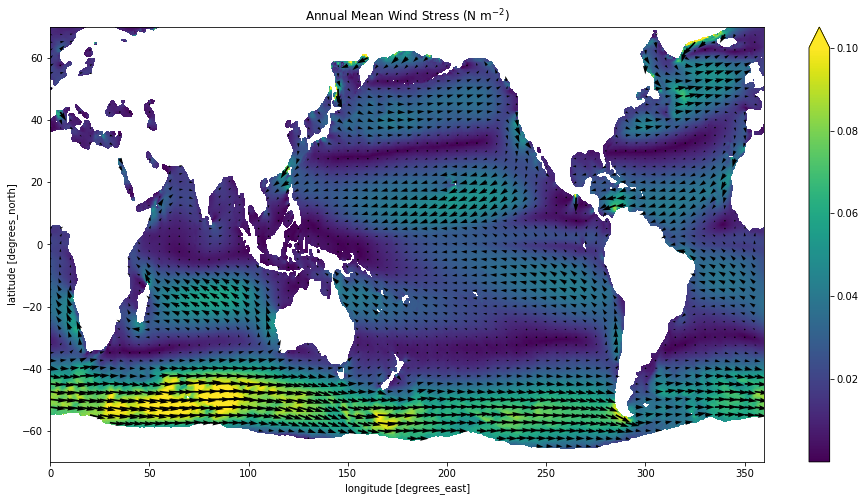

In [6]:
quick_quiver(ds.scow_zonal_wind_stress, ds.scow_meridional_wind_stress,
             mag_max=0.1, sampling_x=20, figsize=(16,8))
plt.title(r'Annual Mean Wind Stress (N m$^{-2}$)');

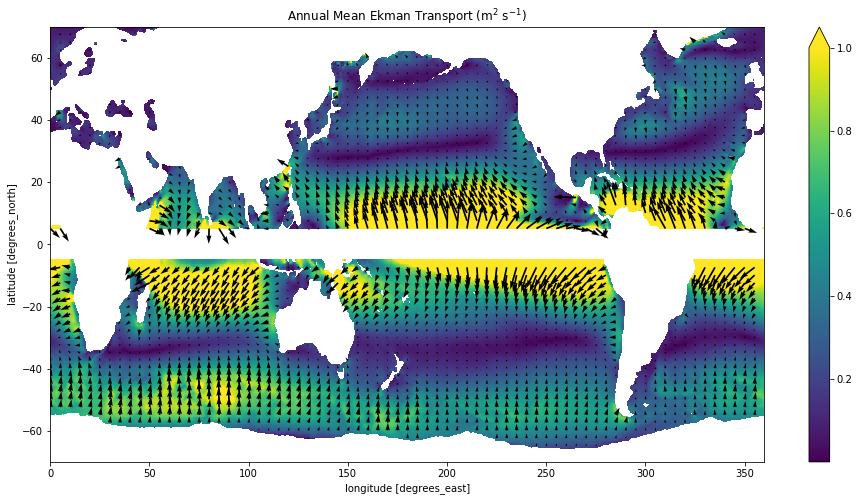

In [8]:
quick_quiver(ds['U_ek'], ds['V_ek'], mag_max=1,
             sampling_x=20, figsize=(16,8))
plt.title(r'Annual Mean Ekman Transport (m$^{2}$ s$^{-1}$)');


/Users/csjones/anaconda3/envs/phys_ocean/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


NameError: name 'V_ek' is not defined

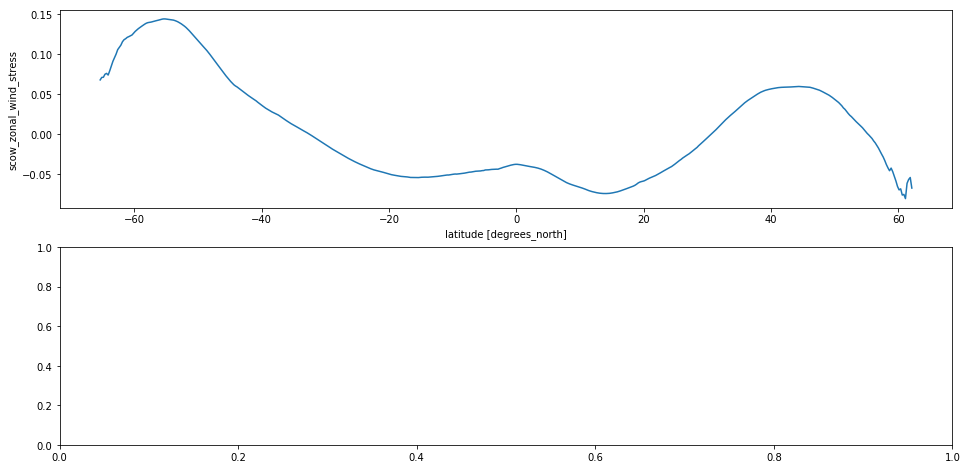

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16,8))
(ds.scow_zonal_wind_stress
    .sel(longitude=slice(150,250))
    .mean(dim='longitude')
    .plot(ax=ax1))
((V_ek * (110e3 * 100 * np.cos(np.deg2rad(ds.latitude)))/1e6)
    .sel(longitude=slice(150,250))
    .mean(dim='longitude')
    .plot(ax=ax2))
ax1.set_title('Zonal Mean Wind Stress (150-250 Longitude)')
ax2.set_ylim(-20, 20)
ax2.set_ylabel('Ekman Transport (Sv) (150-250 Longitude)')

## Coastal Upwelling


(<matplotlib.axes._subplots.AxesSubplot at 0x1e43143c8>,
 <matplotlib.quiver.Quiver at 0x18674d048>)

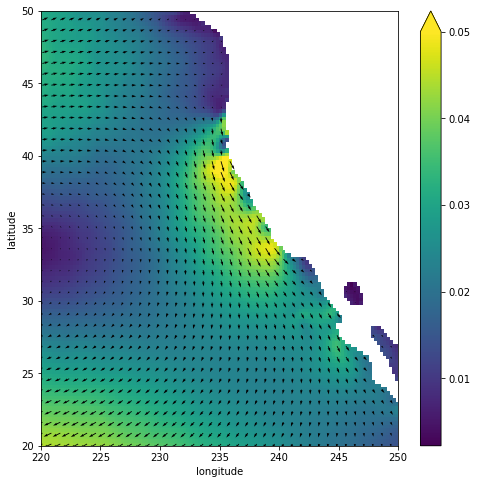

In [114]:
cal = ds.sel(longitude=slice(220, 250), latitude=slice(20,50))
quick_quiver(cal.scow_zonal_wind_stress, cal.scow_meridional_wind_stress,
             mag_max=0.05, sampling_x=3, sampling_y=3, figsize=(8,8));

![Coastal Upwelling](https://www.nwfsc.noaa.gov/research/divisions/fe/estuarine/oeip/figures/Figure_CU-01.JPG)

https://www.nwfsc.noaa.gov/research/divisions/fe/estuarine/oeip/db-coastal-upwelling-index.cfm

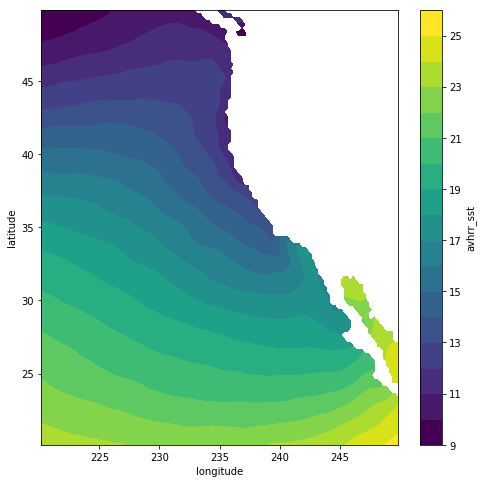

In [120]:
plt.figure(figsize=(8,8))
cal.avhrr_sst.plot.contourf(levels=20)

## Global Ekman Pumping

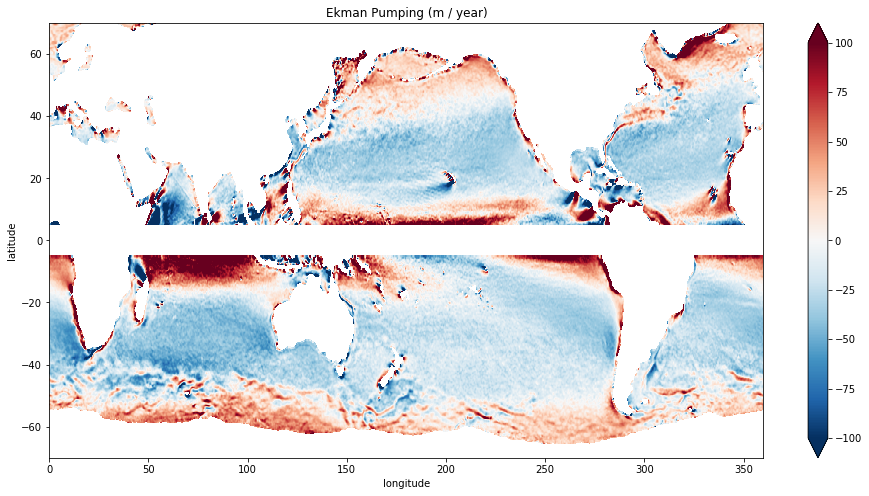

In [138]:
# this is only approximate...f should be inside the curl
w_ek = (ds.scow_wind_stress_curl / (rho0 * f) / 1e7).where(abs(ds.latitude)>5)

plt.figure(figsize=(16,8))
(w_ek * 24*60*60*364).plot(vmax=100)
plt.title('Ekman Pumping (m / year)')